In [38]:
import sklearn
sklearn.__version__

'0.23.1'

In [60]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import re
import numpy as np
import seaborn as sns
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from scipy import stats

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

show_plots = True

**Data Set Information:**

The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types). 

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. 

Some background information for these four wilderness areas: Neota (area 2) probably has the highest mean elevational value of the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) would have a lower mean elevational value, while Cache la Poudre (area 4) would have the lowest mean elevational value. 

As for primary major tree species in these areas, Neota would have spruce/fir (type 1), while Rawah and Comanche Peak would probably have lodgepole pine (type 2) as their primary species, followed by spruce/fir and aspen (type 5). Cache la Poudre would tend to have Ponderosa pine (type 3), Douglas-fir (type 6), and cottonwood/willow (type 4). 

**Source:** https://archive.ics.uci.edu/ml/datasets/covertype

## Read the provided dataset and understand the observations

In [66]:
# Read data set provided from the Kaggle competition website

train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")
test3_df = pd.read_csv("data/test3.csv")

print("The training dataset contains {0} observations with {1} features for each observation.".\
    format(train_df.shape[0], train_df.shape[1]))
train_df.head()

The training dataset contains 15120 observations with 56 features for each observation.


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [42]:
print("The test dataset contains {0} observations with {1} features for each observation.".\
    format(test_df.shape[0], test_df.shape[1]))
test_df.head()

The test dataset contains 565892 observations with 55 features for each observation.


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,0


In [43]:
print("The test3 dataset contains {0} observations with {1} features for each observation.".\
    format(test3_df.shape[0], test3_df.shape[1]))
test3_df.head()

The test3 dataset contains 5 observations with 5 features for each observation.


,id,fruit,count,drinks,snacks
0,1,apple,2,4,hersheys
1,2,banana,3,3,ice cream
2,3,citrus,4,1,cookies
3,4,apple,3,3,donuts
4,5,durian,5,6,icepop


This test3 dataset is not providing any meaningful connection to the problem statement or the data we are interestedin studying here. So, we can ignore test3 dataset that has been provided in the database.

In [44]:
# Print all the column types and understand the names and data type in the columns
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

**Data Description:**

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. We have to predict an integer classification for the forest cover type. The seven types are:
- Spruce/Fir
- Lodgepole Pine
- Ponderosa Pine
- Cottonwood/Willow
- Aspen
- Douglas-fir
- Krummholz

**Attribute Information:**

Given is the attribute name, attribute type, the measurement unit and a brief description. The forest cover type is the classification problem. The order of this listing corresponds to the order of numerals along the rows of the database. 

Name / Data Type / Measurement / Description 

- Elevation / quantitative /meters / Elevation in meters 
- Aspect / quantitative / azimuth / Aspect in degrees azimuth 
- Slope / quantitative / degrees / Slope in degrees 
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features 
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features 
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway 
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice 
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice 
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice 
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points 
- Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation 
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation 
- Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

**Source:** https://archive.ics.uci.edu/ml/datasets/covertype

## Review training dataset by looking at histograms

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text major ticklabel objects>)

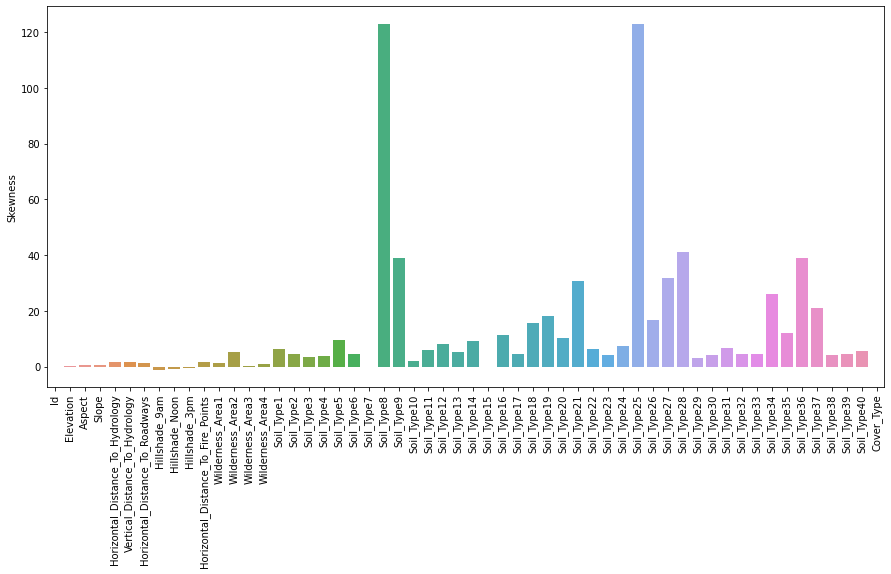

In [54]:
# Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable 
# about its mean. Let us run skew to find the skewness in our data
skew=train_df.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

We can observe high skewness in few soil types in the data set. Based on this observation, we might have to perform some transformation to account for the skewness in the dataset.

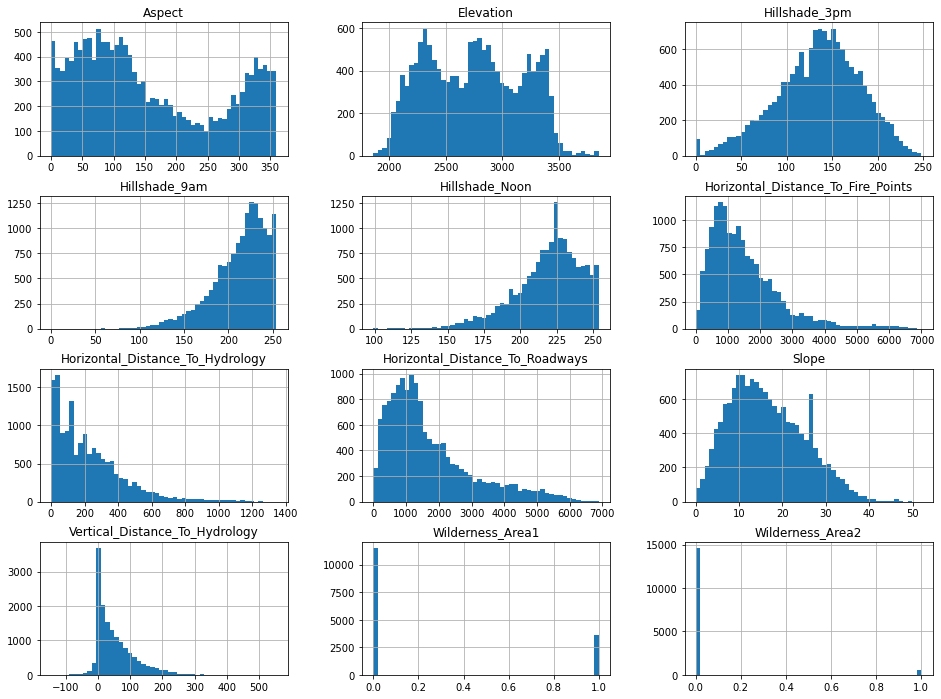

In [55]:
# Plot distribution of some of the dataset to understand the profiles

train_df.iloc[:,1:13].hist(figsize=(16,12),bins=50)
plt.show()

In the training and test dataset, the first 10 features of each observation (Elevation to Horizontal_Distance_To_Fire_Points) are continuous, with different ranges. The remaining 44 features are all binary. 4 of those 44 binary features correspond to Wilderness Area (i.e., there are 4 possible types), so any observation will have one 1 and three 0's in those columns. The last 40 features correspond to Soil Type (i.e., there are 40 possible types), so any observation will have one 1 and thirty-nine 0's in those columns.

The histograms of each feature in the training data set indicates a non-normal distribution for most of the variables. Hillshade 3-m and slope show a near normal distribution. We noticed that the histogram of Hillshade_3pm contains several 0's, especially in the training set, which might make us think of missing values coded with 0, but according to the dataset description that feature can take this value, so we shall accept those values as valid. Wilderness area variable is a binary attribute with 0 or 1 for the values. Test data set distribution shown below is very similar to the training dataset distribution with the exception of Elevation and Slope attributes, which show a different distribution for test dataset.

## Review test dataset by looking at histograms

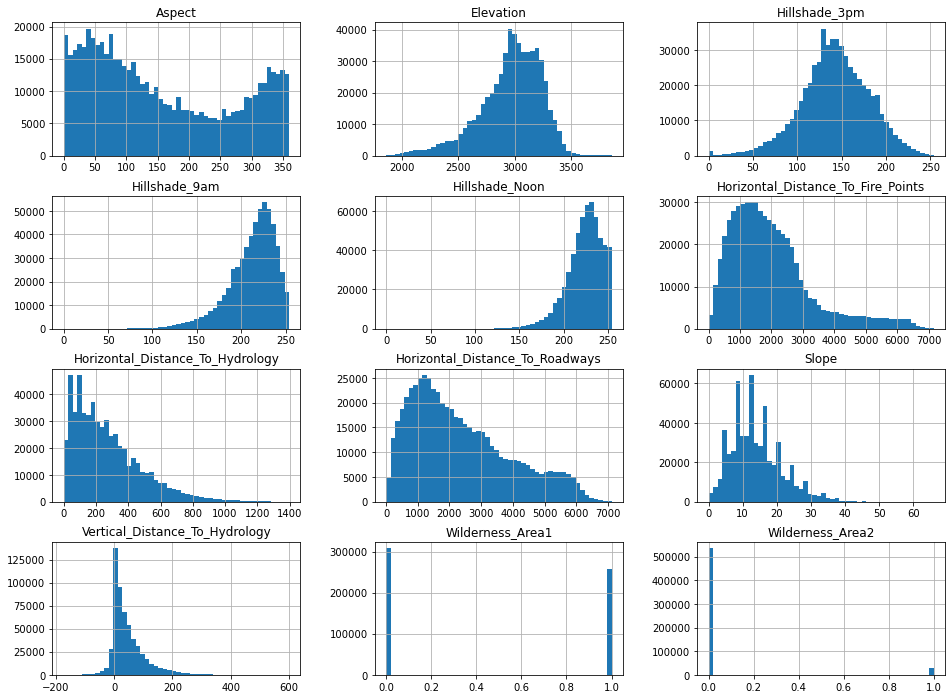

In [56]:
test_df.iloc[:,1:13].hist(figsize=(16,12),bins=50)
plt.show()

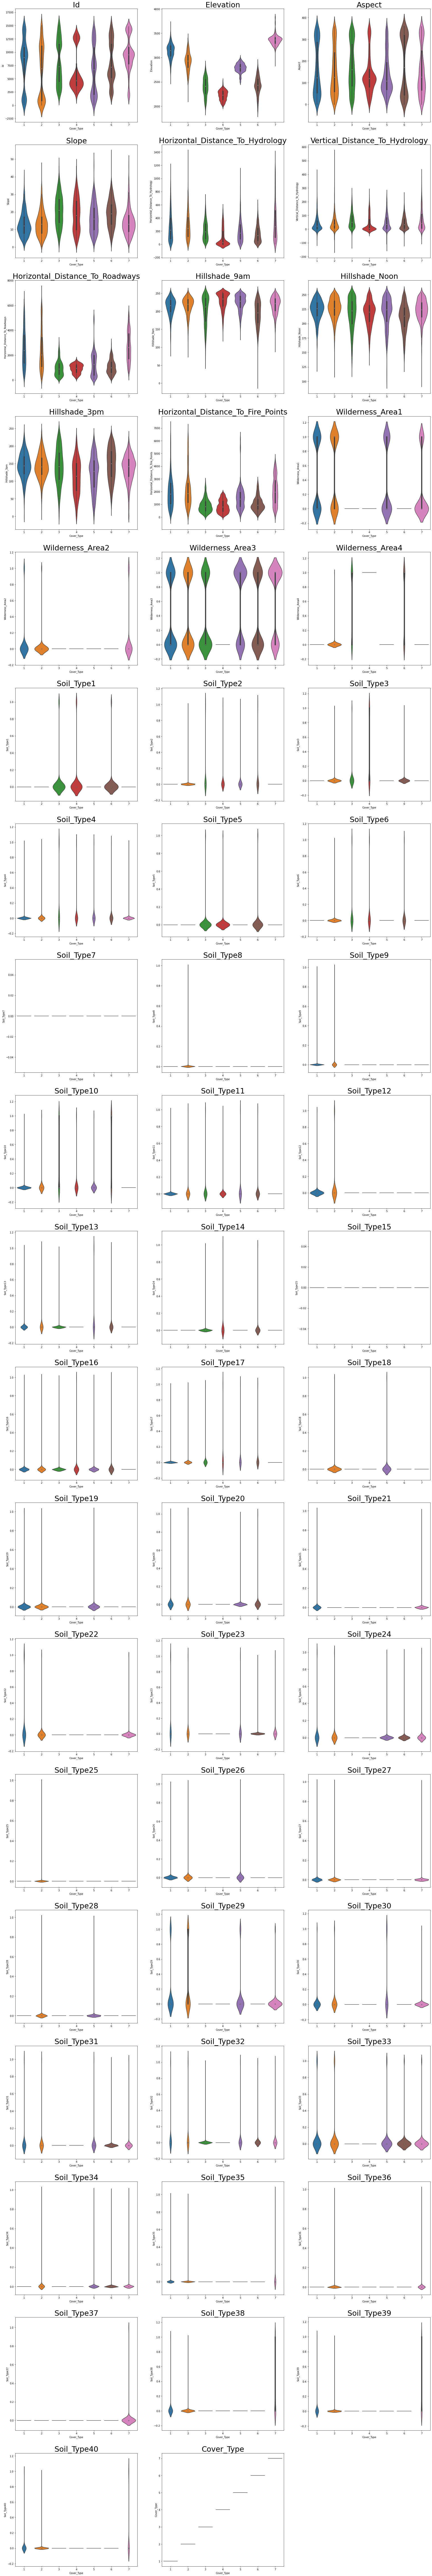

In [112]:
# Violin plots of the different attributes as a function of cover type

y=train_df['Cover_Type']
if show_plots:
    # plot each feature (y axis) with target (x axis)
    plt.figure(figsize=(30, 190))

    # iterate through feature names and assign to pyplot subplot
    for i,feature_name in enumerate(train_df.columns.values):
        plt.subplot(19,3,i+1)
        sn.violinplot(y, train_df[feature_name])
        plt.title(feature_name, fontsize=30)

    plt.show()

When we review different continuous variables as a function of the cover type, we can observe that elevation has the most dependence on cover type. We can see from the aboe box plots that cover type varies by elevation more while the box plots for aspect, slope, horizontal distance and other contiuous variables do not show any strong impact on cover type. While we observe some outiers, we do not see dependence of cover type on most continuous variables (except elevation).

## Review Outliers in the data

In [68]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

# loop through all columns to see if there are any outliers
for column in train_df.columns:
    if outlier_function(train_df, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train_df, column)[2], column))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

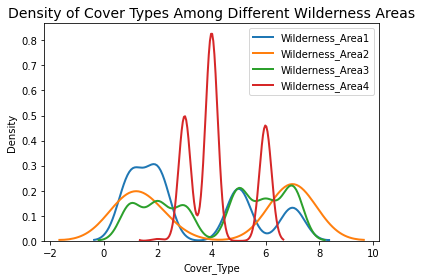

In [69]:
# Check if the Cover_Type shows non-uniform distribution among different Wilderness_Areas
# Create one column as Wilderness_Area_Type and represent it as categorical data

data = train_df.copy()
data['Wilderness_Area_Type'] = (data.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(data['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
figsize=(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = data[data['Wilderness_Area_Type'] == area]
    sn.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

From the distribution plots, wilderness area 4 has a peak distribution with cover type 4 and secondary distributions around cover types 3 and 6. Wilderness area 1 has peak distribution around cover types 1 and 2 followed by 5 and 7. Wilderness area 2 has cover types 1 and 7 only. Wilderness area 3 has a spread of cover types.

## Correlation Plots

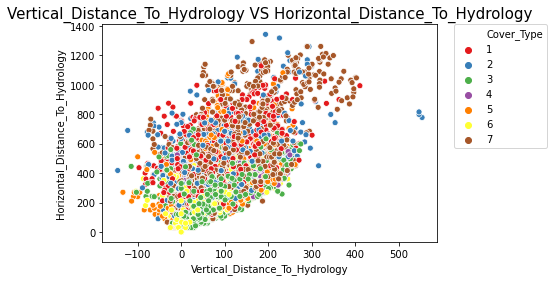

In [101]:
# Visualize some collinear features with Cover_Type

figsize = (20,20)

# plot the first subplot
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

All cover types show a linear relationship between vertical and horizontal distance to hydrology. The slopes of the cover types do not show any difference though the absolute position is different depending on the cover type. For a given vertical distance to hydrology, as the horizontal distance to hydrology increases the type of cover tends to change. Cover types 1, 2, and 7 are dominant at higher horizontal distance to hydrology while cover types 3 and 6 are dominant at lower horizontal distance to hydrology for a given vertical distance.

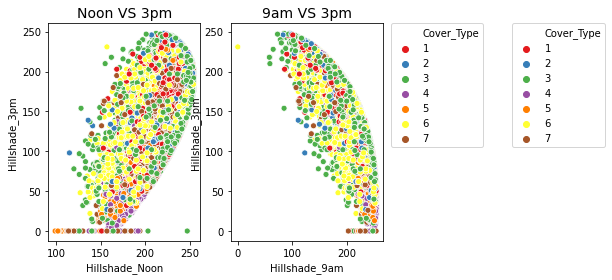

In [110]:
# Visualize hillshade correlations. We pick hillshade 3pm as the representative variable
figsize = (24,20)

# plot the first subplot - noon vs 3pm
plt.subplot(1,2,1)
sn.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_df, 
                hue_norm=(0,8), palette="Set1")
plt.title("Noon VS 3pm", size=14)
plt.legend(bbox_to_anchor=(3.05, 1), loc=2, borderaxespad=0.)

# plot the second subplot - noon vs 9am
plt.subplot(1,2,2)
sn.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_df, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("9am VS 3pm", size=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In the above plots, we are showing hillshade at 3 pm versus hillshade at noon and 9am. The axis values are proxy for illumination levels. Lower value represents no light and higher value is full brightness. In the noon time, hillshade has a positively increasing slope relationship with hillshade at 3pm. With increasing illumination on the hillshade at noon, the hillshade at 3pm also increases. For hillshade at 9m, there is a negative slope for hillshade at 3pm. When it is brightest at 9am, it shows lowest illumination intensity at the hillshade for 3pm. Based on observation, we can conclude that there are correlations between hillshade at different times and we can use one of the hillshade timing variable as a representation for hillshade as they are all correlated to each other.

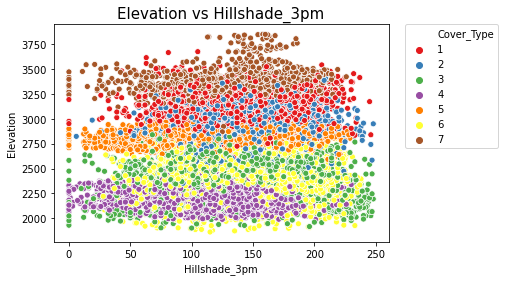

In [103]:
# Visualize some collinear features with Cover_Type

figsize = (20,20)

# plot the first subplot - Elevation vs Hillshade
sns.scatterplot(x="Hillshade_3pm", y="Elevation", 
                hue="Cover_Type", data=train_df,
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation vs Hillshade_3pm", size=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

We have seen from the earlier graphs that elevation has highest impact on cover type. Let us plot elevation vs hillshade at 3pm. Plot above shows the relationship between hillshade_3pm and elevation for different cover types. Cover types are more dependent on the elevation compared to specific hill shade at 3pm. In ascending order of elevation, following cover types can be found.

1. Cover type 4
2. Cover types 3 and 6
3. Cover type 5
4. Cover type 2
5. Cover type 1
6. Cover type 7

From the above we can consider that elevation has a significant impact on the cover type. We can also conclude that the distance to hydrology does have a secondary impact on the cover type.

## Split the training data into train and dev dataset

In [114]:
# Split the training data into train and dev data set.
# Read the training data into X and y

train_file = open("data/train.csv")
column_names_train = train_file.readline()
data = np.loadtxt(train_file, delimiter=",")

y, X = data[:, -1].astype('u1'), data[:, :-1]

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, y = X[shuffle], y[shuffle]

# Split the training data into 90% training data and 10% dev data
train_size = int(X.shape[0] * 0.9)

# Discard 1st feature (ID number that doesn't provide info about the label)
y_train, X_train = y[:train_size], X[:train_size, 1:]
y_dev, X_dev = y[train_size:], X[train_size:, 1:]
print(X_dev.shape, X_train.shape)

# Read the test data and store in X_test
test_file = open("data/test.csv")
column_names_test = test_file.readline()
data_test = np.loadtxt(test_file, delimiter=",")

# Save the test data in X_test. Test data does not have the 1st feature
X_test = data_test
X_test = X_test[:, 1:]
print(X_test.shape)

(1512, 54) (13608, 54)
(565892, 54)


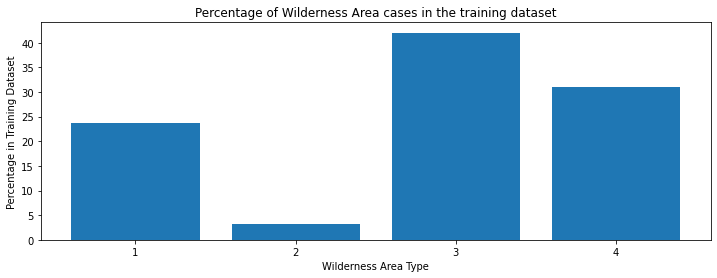

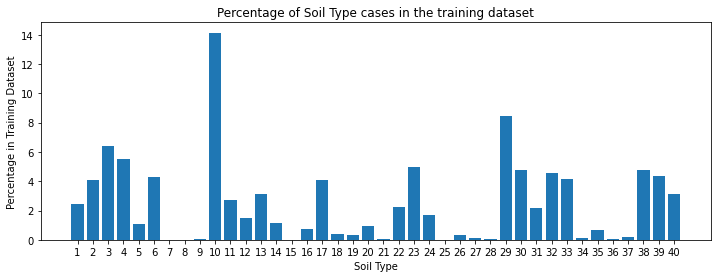

In [115]:
# Count the total number of observations that are wilderness area types
Wilderness = 100*X_train[:,10:14].sum(axis=0)/X_train[:,10:14].sum()

# Count the total number of observations that are different soil types
Soil = 100*X_train[:,14:54].sum(axis=0)/X_train[:,14:54].sum()

# Plot the distribution of wilderness area
plt.figure(figsize=(12, 4))
plt.bar(np.arange(4), Wilderness, align="center")
plt.title("Percentage of Wilderness Area cases in the training dataset")
plt.xticks(np.arange(4), np.array([str(i) for i in np.arange(1,5)]))
plt.xlabel("Wilderness Area Type")
plt.ylabel("Percentage in Training Dataset")

# Plot the distribution of soil type
plt.figure(figsize=(12, 4))
plt.bar(np.arange(40), Soil, align="center")
plt.title("Percentage of Soil Type cases in the training dataset")
plt.xticks(np.arange(40), np.array([str(i) for i in np.arange(1,41)]))
plt.xlabel("Soil Type")
plt.ylabel("Percentage in Training Dataset")

plt.show()

For the traiing dataset, we see over 40% of the data is represented by wilderness area type 3. This is followed by 30% and 25% representation by wilderness area type 4 and area type 1, respectively. In contrast, wilderness area type 2 has very low representation in training dataset.

There is a skewed distribution of soil type data in the training dataset. Soil type 10 has highest representation then there is a distribution of soil types represented in the data set. Some of the soil types have very low representation in the training dataset.

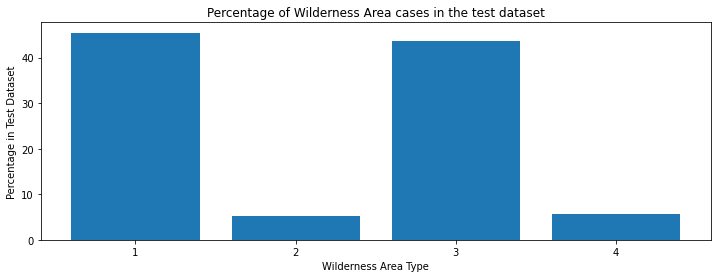

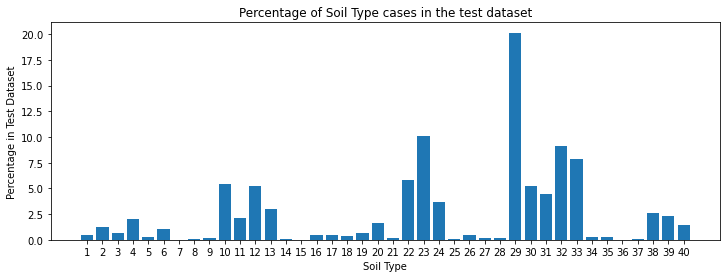

In [116]:
# Count the total number of observations that are wilderness area types
Wilderness = 100*X_test[:,10:14].sum(axis=0)/X_test[:,10:14].sum()

# Count the total number of observations that are different soil types
Soil = 100*X_test[:,14:54].sum(axis=0)/X_test[:,14:54].sum()

# Plot the distribution of wilderness area
plt.figure(figsize=(12, 4))
plt.bar(np.arange(4), Wilderness, align="center")
plt.title("Percentage of Wilderness Area cases in the test dataset")
plt.xticks(np.arange(4), np.array([str(i) for i in np.arange(1,5)]))
plt.xlabel("Wilderness Area Type")
plt.ylabel("Percentage in Test Dataset")

# Plot the distribution of soil type
plt.figure(figsize=(12, 4))
plt.bar(np.arange(40), Soil, align="center")
plt.title("Percentage of Soil Type cases in the test dataset")
plt.xticks(np.arange(40), np.array([str(i) for i in np.arange(1,41)]))
plt.xlabel("Soil Type")
plt.ylabel("Percentage in Test Dataset")

plt.show()

The test dataset distribution for wilderness area type and soil type looks very different from the training dataset. For the test data set, wilderness type 1 and 3 are represented heavily in the dataset with very low percentage of data (<10% each) for wilderness area types 1 and 2. Similarly, for soil type, there is a high representation for soil type 29 and significantly different distribution profile in the test data for soil types compared to training dataset. 